In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(Xtrain,ytrain),(Xtest,ytest) = datasets.cifar10.load_data()
Xtrain.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


(50000, 32, 32, 3)

In [3]:
Xtest.shape

(10000, 32, 32, 3)

In [4]:
ytrain[:5]
#these outputs are 2D arrays but we just need direct clses so we reshape it

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
cls = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
cls[9]

'truck'

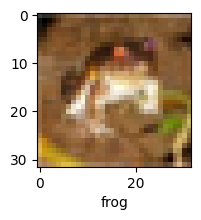

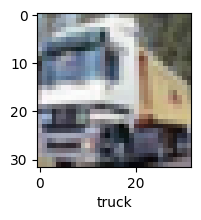

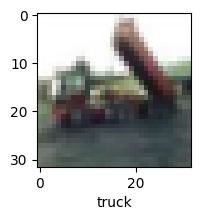

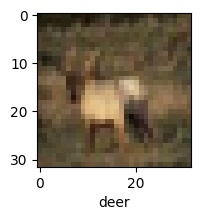

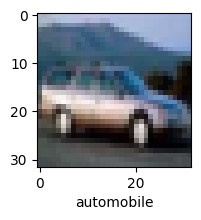

In [8]:
def pltsample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(cls[y[index]])

pltsample(Xtrain,ytrain,0)
pltsample(Xtrain,ytrain,1)
pltsample(Xtrain,ytrain,2)
pltsample(Xtrain,ytrain,3)
pltsample(Xtrain,ytrain,4)


# Normalization

In [9]:
Xtrain= Xtrain/255.0
Xtest= Xtest/255.0

# Neural Network

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(Xtrain,ytrain,epochs=7)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3035 - loss: 1.9329
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4167 - loss: 1.6536
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4499 - loss: 1.5536
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4795 - loss: 1.4843
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4999 - loss: 1.4352
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5120 - loss: 1.3936
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5233 - loss: 1.3580


we are using sparse_categorical_crossentropy because we have assigned direct values and not one hot encoded vector which in case we would've used categorical_entropy


In [11]:
ann.evaluate(Xtest,ytest)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4950 - loss: 1.4386


[1.4479718208312988, 0.4875999987125397]

So we can say that ann is performing really bad on this dataset

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(Xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(ytest,y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      1000
           1       0.74      0.47      0.58      1000
           2       0.47      0.29      0.36      1000
           3       0.26      0.54      0.36      1000
           4       0.49      0.33      0.40      1000
           5       0.35      0.43      0.39      1000
           6       0.56      0.48      0.52      1000
           7       0.60      0.52      0.55      1000
           8       0.65      0.59      0.62      1000
           9       0.54      0.64      0.58      1000

    accuracy                           0.49     10000
   macro avg       0.53      0.49      0.49     10000
weighted avg       0.53      0.49      0.49     10000



#Convolutional Neural Networks
Now we could say that seeing the results the ann didnot perform well on this dataset

so, to improve the performance we use **CNN**

In [21]:
from tensorflow.keras import layers, models, callbacks

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


sigmoid we dont necessarily get 1 as the sum
lets say 1:0.45 and 2:0.67

but using softmax normalises the probability
1: (0.45)/(0.45+0.67) = 0.40
2: (0.67)/(0.45+0.67) = 0.60
sum is 1

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(Xtrain)


In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0008)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(datagen.flow(Xtrain, ytrain, batch_size=64),
                    validation_data=(Xtest, ytest),
                    epochs=20,
                    callbacks=[early_stop])


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.3011 - loss: 2.2526 - val_accuracy: 0.4932 - val_loss: 1.4295
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4682 - loss: 1.4638 - val_accuracy: 0.5255 - val_loss: 1.3114
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5407 - loss: 1.2824 - val_accuracy: 0.5738 - val_loss: 1.1882
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.5826 - loss: 1.1685 - val_accuracy: 0.6039 - val_loss: 1.2026
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6048 - loss: 1.1031 - val_accuracy: 0.6554 - val_loss: 0.9656
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6353 - loss: 1.0400 - val_accuracy: 0.6567 - val_loss: 0.9602
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6443 - loss: 1.0095 - val_accuracy: 0.6456 - val_loss: 1.0110
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6585 - loss: 0.9754 - val_accurac

In [25]:
model.save("cifar10_model.keras")